In [1]:
%reload_ext autoreload
%autoreload 2

import os
import sys
import json

import numpy as np
from scipy import interpolate

sys.path.append(os.environ['DH_DIR'])

WDIR = os.environ['DM21CM_DIR']

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import colormaps as cms
mpl.rc_file(f"{WDIR}/matplotlibrc")

In [2]:
from pppc import get_pppc_spec, get_pppc_tf
from read import read_pbh
from hadronize import hadronize

# Do the hadronization!

In [3]:
ddir = '/n/home07/yitians/dm21cm/blackhawk/BlackHawk_v2.3/results/m15.000_primaryonly'

In [4]:
from hadronize import build_or_read_tf

In [8]:
data_pri = read_pbh(ddir, 'primary', 'up') # for common E and t
eng = data_pri['E'] # eV
tf = build_or_read_tf('../../data/pppc/pppc_table.h5', eng, eng)

In [14]:
hadronize(ddir)

Processed: ['strange', 'down', 'charm', 'wpm', 'higgs', 'bottom', 'muon', 'neutrinos', 'top', 'z0', 'tau', 'electron', 'up', 'photon', 'gluon', 'graviton']


# Check energy conservation

In [109]:
eng_out = np.logspace(0, 13, 1001) # eV
eng_in = np.logspace(1, 11, 11) # eV
tf_phot = get_pppc_tf(eng_in=eng_in, eng_out=eng_out, pri='q', sec='phot')
tf_elec = get_pppc_tf(eng_in=eng_in, eng_out=eng_out, pri='q', sec='elec')

for i, e_in in enumerate(eng_in):
    print(np.log10(e_in))
    print(np.trapz(eng_out * tf_phot[i], eng_out) / e_in)
    print(np.trapz(eng_out * tf_elec[i], eng_out) / e_in)
    print()

1.0
0.34595145033774466
0.1230151193730562

2.0
0.5760835798354222
0.305655387452348

3.0
0.5804519490724557
0.31452528489496

4.0
0.580464724774016
0.3146075982541712

5.0
0.580475545880307
0.3146158006111128

6.0
0.5804863986742294
0.314616326706783

7.0
0.5804972673579297
0.314616807499994

8.0
0.5805081914338769
0.3146172894615907

9.0
0.580519202799251
0.3146177649444262

10.0
0.5789546788550852
0.3128142346854565

11.0
0.5785269826467071
0.31083697882782524



# Test

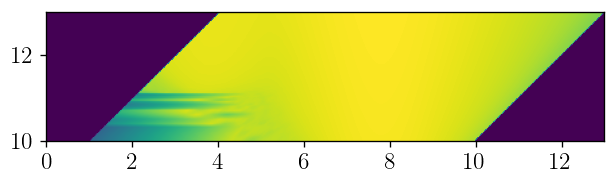

In [101]:
eng_out = np.logspace(0, 13, 1001) # eV
eng_in = np.logspace(10, 13, 100) # eV
tf = get_pppc_tf(eng_in=eng_in, eng_out=eng_out, pri='q', sec='phot')
plt.imshow(np.log(np.clip(tf, 1e-50, None)), origin='lower', extent=(0, 13, 10, 13))

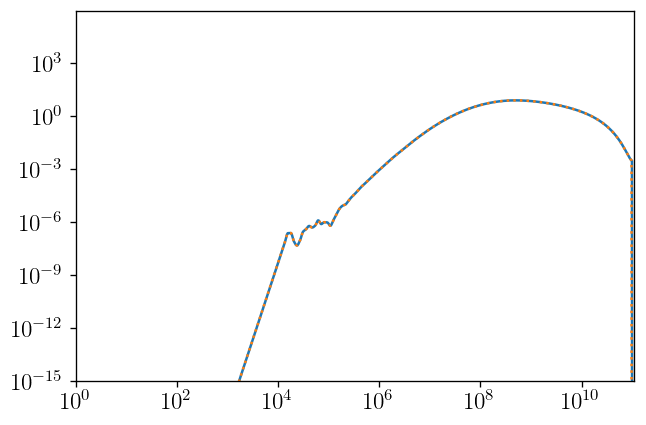

In [100]:
# compare with single
ind = np.argmin(np.abs(eng_in - 1e11))
plt.plot(eng_out, eng_out*tf[ind])
plt.loglog()
plt.ylim(1e-15, None)
plt.xlim(1e0, 1.1e11)

# 100 GeV up quark
eng_out_p = np.logspace(0, 11, 1000) # eV
eng_in_p = 1e11 # eV
dNdE_phot = get_pppc_spec(eng_in=eng_in_p, eng_out=eng_out_p, pri='q', sec='phot')
plt.plot(eng_out_p, eng_out_p*dNdE_phot, ':', label='photon')

# Check output

In [5]:
# input energy bounds
k = 'tau'
print(dlNdlxIEW_interp['elec'][k]._mDM_in_GeV_arrs[0][0])
print(dlNdlxIEW_interp['elec'][k]._mDM_in_GeV_arrs[0][-1])
print(dlNdlxIEW_interp['elec'][k]._mDM_in_GeV_arrs[1][0])
print(dlNdlxIEW_interp['elec'][k]._mDM_in_GeV_arrs[1][-1])

5.0
100000.0
5.0
100000.0


In [102]:
# 100 GeV up quark
eng_out = np.logspace(0, 11, 1000) # eV
eng_in = 1e11 # eV
dNdE_elec = get_pppc_spec(eng_in=eng_in, eng_out=eng_out, pri='q', sec='elec')
dNdE_phot = get_pppc_spec(eng_in=eng_in, eng_out=eng_out, pri='q', sec='phot')

In [103]:
print(np.trapz(eng_out*dNdE_elec, eng_out) / 1e11)
print(np.trapz(eng_out*dNdE_phot, eng_out) / 1e11)

0.3108224606200211
0.5784341502305048


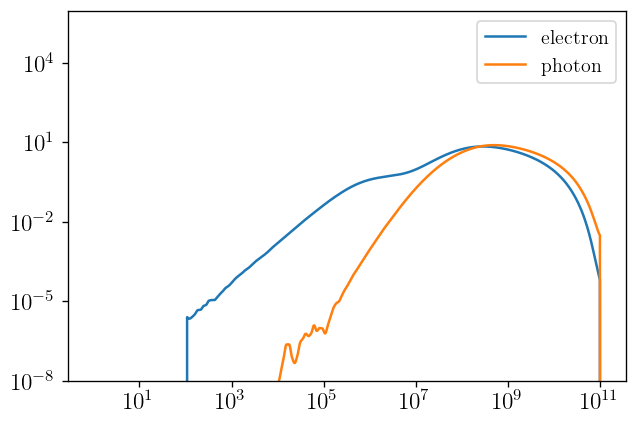

In [104]:
plt.plot(eng_out, eng_out*dNdE_elec, label='electron')
plt.plot(eng_out, eng_out*dNdE_phot, label='photon')
plt.loglog()
plt.ylim(1e-8, None)
plt.legend()

# Check with PYTHIA_NEW in BlackHawk

In [11]:
bh_table_dir = "/n/home07/yitians/dm21cm/blackhawk/BlackHawk_v2.3/src/tables/hadronization_tables/pythia_tables_new"

In [42]:
table_phot = np.loadtxt(f"{bh_table_dir}/photon.txt", skiprows=1).reshape(250, 500, -1)
in_energies = table_phot[:,0,0]
out_energies = table_phot[0,:,1]

In [28]:
col_names = ['initial_energy', 'final_energy', 'photon', 'gluons', 'higgs', 'Wpm', 'Z0', 'electron', 'muon', 'tau', 'up', 'down', 'charm', 'strange', 'top', 'bottom']
i = col_names.index('up')

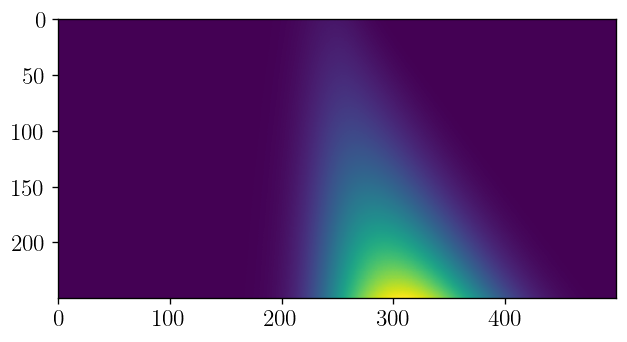

In [29]:
plt.imshow(table_phot[:, :, i])
plt.xlabel('out energy')

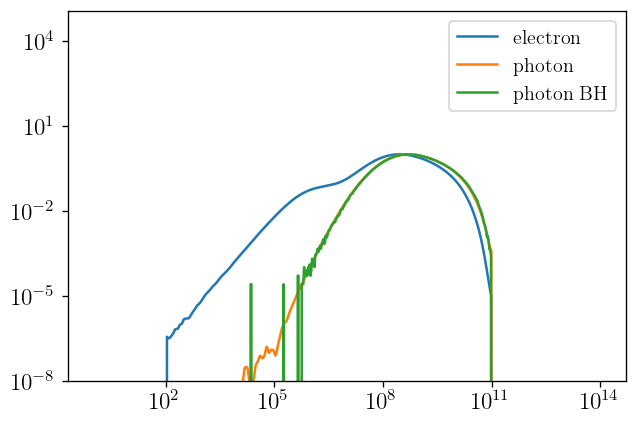

In [43]:
z = eng_out*dNdE_elec
z /= np.max(z)
plt.plot(eng_out, z, label='electron')
z = eng_out*dNdE_phot
z /= np.max(z)
plt.plot(eng_out, z, label='photon')

ind = np.argmin(np.abs(in_energies - 1e11/1e9))
z = np.copy(table_phot[:, :, i][ind])
z /= np.max(z)
plt.plot(out_energies*1e9, z, label='photon BH')

plt.loglog()
plt.ylim(1e-8, None)
plt.legend()

# Archive

In [46]:
# Mass threshold for mDM to annihilate into the primaries.


def get_pppc_spec(pri, pri_spec, sec, sec_eng):
    """Returns the PPPC4DMID seconadry spectrum for a given primary spectrum.

    These results include electroweak
    corrections. The full list of allowed channels is: 

    - Leptons: ``e_L, e_R, e, mu_L, mu_R, mu, tau_L, tau_R, tau``
    - Quarks:  ``q, c, b, t``
    - Gauge bosons: ``gamma, g, W_L, W_T, W, Z_L, Z_T, Z``
    - Higgs: ``h``

    Variables with subscripts, e.g. ``e_L``, correspond to particles with different
    polarizations. These polarizations are suitably averaged to obtain the spectra
    returned in their corresponding variables without subscripts, e.g. ``e``. 

    Args:
        pri (str): The primary channel.
        pri_spec (Spectrum): The input spectrum (kinetic + mass).
        sec {'elec', 'phot'}: The secondary channel.
        sec_eng (array): The energy array for the secondary spectrum.

    Returns:
        Spectrum: The secondary spectrum with sec_eng as the energy array.
    """

    dlNdlxIEW_interp = load_data('pppc')

    n_bin_to_interp = 10000
    sec_eng = np.geomspace(sec_eng[0], sec_eng[-1], n_bin_to_interp)

    pri_spec.switch_spec_type('N')
    spec = Spectrum(sec_eng, np.zeros_like(sec_eng), spec_type='dNdE')
    for N_in, E_in in zip(pri_spec.N, pri_spec.eng):

        E_in_GeV = E_in/1e9
        if not (5 < E_in_GeV < 1e5):
            continue
    
        log10x = np.log10(sec_eng/E_in)
        dN_dlog10x = 10**dlNdlxIEW_interp[sec][pri].get_val(E_in/1e9, log10x)

        # dN/dE = dN/dlog10x * dlog10x/dE
        spec.dNdE += N_in * dN_dlog10x/(sec_eng*np.log(10))
    
    # Rebin down to the original binning.
    # The highest bin of spec.eng should be the same as eng[-1], based on
    # the interpolation strategy above. However, sometimes a floating point
    # error is picked up. We'll get rid of this so that rebin doesn't
    # complain.
    spec.eng[-1] = sec_eng[-1]
    spec.rebin(sec_eng)
        
    return spec

In [26]:
results_dir = '/n/home07/yitians/dm21cm/blackhawk/BlackHawk_v2.2/results'
run_name = 'm13.200_sec'

run_dir = f"{results_dir}/{run_name}"

In [32]:
sec_spec = read_pbh(run_dir, 'primary', particle='up')
sec_spec.keys()

dict_keys(['E', 't', 'dN_dEdt', 'units'])

In [51]:
in_spec = Spectrum(sec_spec['E'], sec_spec['dN_dEdt'][50], spec_type='dNdE')
print(in_spec.toteng())

2.0980100510582354e+32


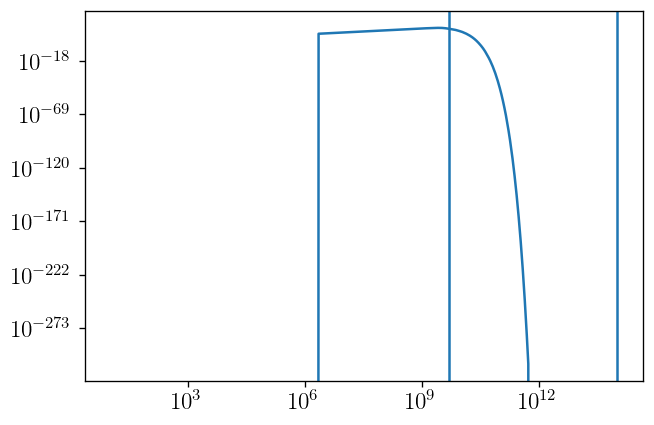

In [50]:
plt.plot(sec_spec['E'], sec_spec['dN_dEdt'][50])
plt.loglog()
plt.axvline(5e9)
plt.axvline(1e14)

In [54]:
spec_out = get_pppc_spec('q', in_spec, 'elec', binning['elecE'])
print(spec_out.toteng())
spec_out = get_pppc_spec('q', in_spec, 'phot', binning['photE'])
print(spec_out.toteng())

5.706458899588104e+30
1.0539266721650763e+31


In [49]:
spec_out.toteng()

5.706458899588104e+30

In [6]:
binning = load_data('binning')

In [14]:
np.min(binning['elecE'])

1.029782576544676

In [15]:
eng = np.copy(binning['elecE'])
mDM = 1e7

log10x = np.log10(eng/mDM)

# Refine the binning so that the spectrum is accurate. 
# Do this by checking that in the relevant range, there are at
# least 50,000 bins. If not, double (unless an absurd number
# of bins already).
if (
    log10x[(log10x < 1) & (log10x > 1e-9)].size > 0
    and log10x.size < 500000
):
    while log10x[(log10x < 1) & (log10x > 1e-9)].size < 50000:
        log10x = np.interp(
            np.arange(0, log10x.size-0.5, 0.5), 
            np.arange(log10x.size), 
            log10x
        )
        print(log10x.size)
# Get the interpolator. 
dlNdlxIEW_interp = load_data('pppc')


999
1997
3993
7985
15969
31937
63873
127745
255489
510977
1021953


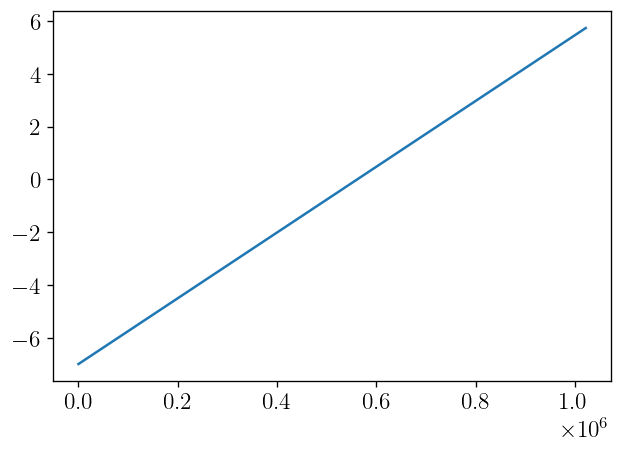

In [16]:
plt.plot(log10x)

In [ ]:

# Get the spectrum from the interpolator.
dN_dlog10x = 10**dlNdlxIEW_interp[sec][pri].get_val(mDM/1e9, log10x)

# Recall that dN/dE = dN/dlog10x * dlog10x/dE
x = 10**log10x
spec = Spectrum(x*mDM, dN_dlog10x/(x*mDM*np.log(10)), spec_type='dNdE')

# Rebin down to the original binning.

# The highest bin of spec.eng should be the same as eng[-1], based on
# the interpolation strategy above. However, sometimes a floating point
# error is picked up. We'll get rid of this so that rebin doesn't
# complain.
spec.eng[-1] = eng[-1]
spec.rebin(eng)

In [20]:
import json
data_path = os.environ['DH_DATA_DIR']
print(data_path)

/n/holystore01/LABS/iaifi_lab/Users/yitians/darkhistory/DHdata_hdf5/full


In [21]:
coords_data = np.array(json.load(open(data_path+'/dlNdlxIEW_coords_table.json')), dtype=object)

In [ ]:
coords_data

In [4]:
load_data('pppc')

{'elec': {'e_L': <darkhistory.config.PchipInterpolator2D at 0x7f7a037a59d0>,
  'e_R': <darkhistory.config.PchipInterpolator2D at 0x7f79fb404b50>,
  'e': <darkhistory.config.PchipInterpolator2D at 0x7f79f9426910>,
  'mu_L': <darkhistory.config.PchipInterpolator2D at 0x7f79f9426ad0>,
  'mu_R': <darkhistory.config.PchipInterpolator2D at 0x7f79f9426e10>,
  'mu': <darkhistory.config.PchipInterpolator2D at 0x7f79f9427090>,
  'tau_L': <darkhistory.config.PchipInterpolator2D at 0x7f79f9427250>,
  'tau_R': <darkhistory.config.PchipInterpolator2D at 0x7f79f94275d0>,
  'tau': <darkhistory.config.PchipInterpolator2D at 0x7f79f9427850>,
  'q': <darkhistory.config.PchipInterpolator2D at 0x7f79f9427a10>,
  'c': <darkhistory.config.PchipInterpolator2D at 0x7f79f9427d50>,
  'b': <darkhistory.config.PchipInterpolator2D at 0x7f79f9427fd0>,
  't': <darkhistory.config.PchipInterpolator2D at 0x7f79f92f0290>,
  'W_L': <darkhistory.config.PchipInterpolator2D at 0x7f79f92f0510>,
  'W_T': <darkhistory.config.Pc